# Instrucciones:

1. Limpieza de datos
2. Preprocesamiento:
* info
* describe
* nulos
* duplicados
* balance de clases
* tratamiento de nulos(eliminación, porcentaje de eliminados)
* describe luego de limpiar el dataset
3. Al menos generar 2 visualizaciones.
4. Obtener métricas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename = "/content/StudentsPerformance.csv"
df = pd.read_csv(filename)
df_copy= df
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Datos estadisticos básicos para la base de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


El dataset no contiene datos nulos

In [ ]:
df.duplicated().sum()

0

Tampoco contiene valores duplicados, por lo que se puede trabajar con él.

In [ ]:
df["math score"].value_counts()

65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: math score, Length: 81, dtype: int64

In [ ]:
df["condicion_actual_math"]=0
df["condicion_actual_reading"]=0
df["condicion_actual_writing"]=0
df["condicion_actual_math"].value_counts()

0    1000
Name: condicion_actual_math, dtype: int64

In [ ]:
for i in range(0, len(df["condicion_actual_math"])):
  if df["math score"][i]<70:
    df["condicion_actual_math"][i]="Reprobado"
  else:
    df["condicion_actual_math"][i]="Aprobado"

df["condicion_actual_math"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Reprobado    591
Aprobado     409
Name: condicion_actual_math, dtype: int64

In [ ]:
for i in range(0, len(df["condicion_actual_reading"])):
  if df["reading score"][i]<70:
    df["condicion_actual_reading"][i]="Reprobado"
  else:
    df["condicion_actual_reading"][i]="Aprobado"

df["condicion_actual_reading"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Aprobado     513
Reprobado    487
Name: condicion_actual_reading, dtype: int64

In [ ]:
for i in range(0, len(df["condicion_actual_writing"])):
  if df["writing score"][i]<70:
    df["condicion_actual_writing"][i]="Reprobado"
  else:
    df["condicion_actual_writing"][i]="Aprobado"

df["condicion_actual_writing"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Reprobado    511
Aprobado     489
Name: condicion_actual_writing, dtype: int64

Se crean 3 columnas nuevas donde se define si la/el alumno aprobó o no en la materia señalada. Se establece el limite de aprobación o reprobación en 70.
Se puede observar que las 3 nuevas columnas quedaron balanceadas en sus dos clases.

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Con el dataset ya limpio se generará una nueva columna para predecir el resultado de la columna "condicion_actual_math".

In [ ]:
df["prediccion_math"]=0
df["prediccion_math"].value_counts()

0    1000
Name: prediccion_math, dtype: int64

In [ ]:
import random
lista = ["Aprobado", "Reprobado"]
for i in range(0, len(df["prediccion_math"])):
    x = random.choice(lista)
    df["prediccion_math"][i]=x

df["prediccion_math"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Reprobado    517
Aprobado     483
Name: prediccion_math, dtype: int64

In [ ]:
filtro_aprob = df["condicion_actual_math"]=="Aprobado"
df_aprob = df.loc[filtro_aprob]

filtro_reprob = df["condicion_actual_math"]=="Reprobado"
df_reprob = df.loc[filtro_reprob]

No handles with labels found to put in legend.


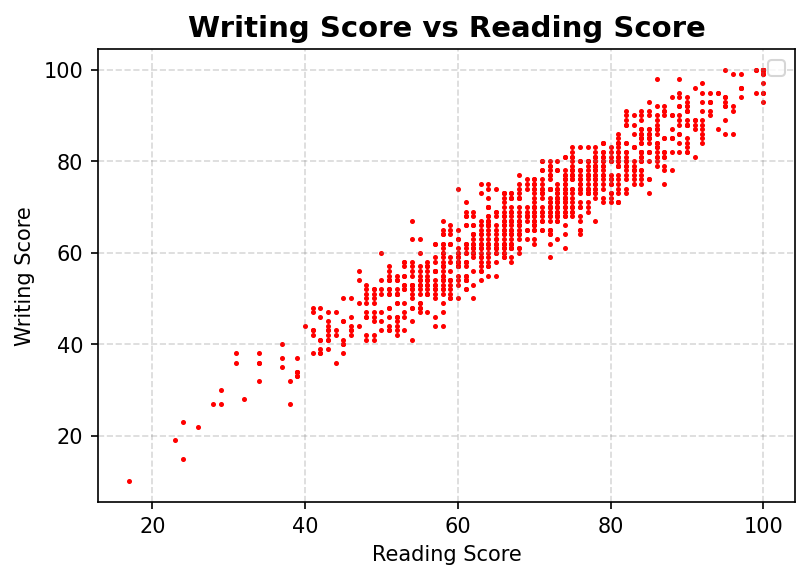

In [ ]:
plt.figure(dpi=150)

plt.scatter(df["reading score"],df["writing score"], s=2, c="red")
plt.ylabel("Writing Score")
plt.xlabel("Reading Score")
plt.title("Writing Score vs Reading Score", fontweight="bold", fontsize=14)
plt.grid(c = 'gray', alpha = .3, linestyle = '--')

plt.legend()
plt.show()

Se puede observar una clara relación entre los puntajes de escritura y lectura. A medida que uno sube, el otro también lo hace.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_test = df["condicion_actual_math"]
predictions = df["prediccion_math"]

In [ ]:
cm = metrics.confusion_matrix(y_test.values, predictions)
print(metrics.confusion_matrix(y_test.values, predictions).ravel())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.values, predictions).ravel()
print(cm)
print(tn, fp, fn, tp)

[189 220 294 297]
[[189 220]
 [294 297]]
189 220 294 297


VN = 203

FP = 206

FN = 293

VP = 298

# Accuracy

In [ ]:
acc= (298+203)/(298+206+293+203)
print(f"{round((acc*100),2)} %")

50.1 %


# Precision

In [ ]:
# (tp)/(tp+fp)
pre= (298)/(298+206)
print(f"{round((pre*100),2)} %")

59.13 %


# Sensitivity

In [ ]:
# tp / (tp + fn)
rec= (298)/(298+293) 
print(f"{round((rec*100),2)} %")

50.42 %


# Tasa Falsos Negativos

In [ ]:
# fn / (fn + vp)
tfn= (293)/(293+298)
print(f"{round((tfn*100),2)} %")

49.58 %


1. El Accuracy es bastante bajo, cercano al 50% lo que se debe a que la columna de predicción fue hecha en base a un random.

